<h1 style='text-align: center'>Multiclass Classification From Scratch</h1>

<p  style='text-align: center'>
This notebook is in <span style='color: green; font-weight: 700'>Active</span> state of development! Check out this notebook to see some updates as I update new stuff as oftern as I learn it!
<a style='font-weight:700' href='https://github.com/LilDataScientist/Multiclass-Classification'> Code on GitHub! </a></p>

<div style='text-align: center'>
    <img src='https://i.postimg.cc/YCj184YN/multiclass-svm1.png' width='500' />
</div>

In [1]:
import numpy as np
import pandas as pd

from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Binary classification VS multiclass classification

Binary classification are those tasks where examples are assigned exactly one of two classes. Multi-class classification is those tasks where examples are assigned exactly one of more than two classes

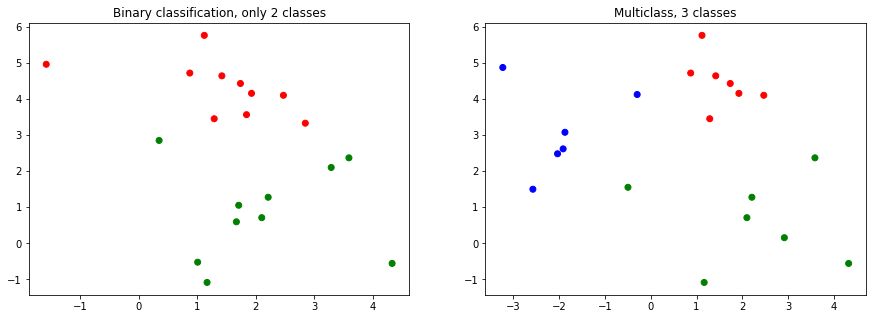

In [2]:
fit, ax = plt.subplots(1, 2, figsize=(15, 5))

X, y = make_blobs(n_samples=20, n_features=2, centers=2, random_state=0)
ax[0].scatter(X[:, 0], X[:, 1], c=np.array(['r', 'g'])[y])
ax[0].title.set_text('Binary classification, only 2 classes')

X, y = make_blobs(n_samples=20, n_features=2, centers=3, random_state=0)
ax[1].scatter(X[:, 0], X[:, 1], c=np.array(['r', 'g', 'b'])[y]);
ax[1].title.set_text('Multiclass, 3 classes')

# Intuition behind Multiclass Classification algorithm 🍇

We already know how to separate 2 classes using LogisticRegression. If you don't you better know how to deal with it! What we're going to do is take our training set and turn this into three separate binary classification problems. We'll turn this into three separate two class classification problems.

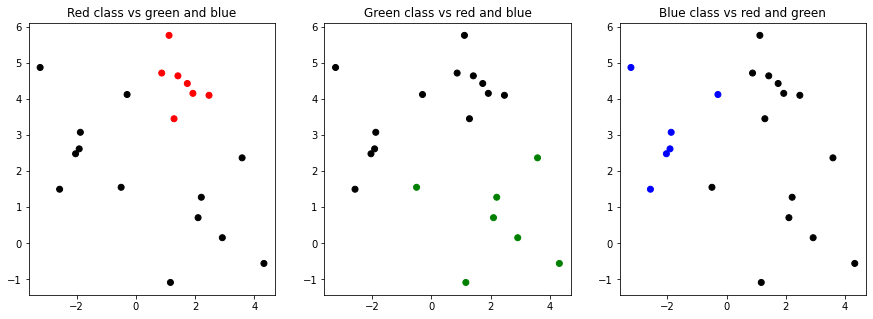

In [3]:
fit, ax = plt.subplots(1, 3, figsize=(15, 5))

X, y = make_blobs(n_samples=20, n_features=2, centers=3, random_state=0)
ax[0].scatter(X[:, 0], X[:, 1], c=np.array(['r', 'black', 'black'])[y]);
ax[0].title.set_text('Red class vs green and blue')

X, y = make_blobs(n_samples=20, n_features=2, centers=3, random_state=0)
ax[1].scatter(X[:, 0], X[:, 1], c=np.array(['black', 'g', 'black'])[y]);
ax[1].title.set_text('Green class vs red and blue')

X, y = make_blobs(n_samples=20, n_features=2, centers=3, random_state=0)
ax[2].scatter(X[:, 0], X[:, 1], c=np.array(['black', 'black', 'b'])[y]);
ax[2].title.set_text('Blue class vs red and green')

Now we want to learn our model for each of these classification problems. For class that we are trying to predict we assign positive class, 1, in case of first plot it will be red class, and others will be negative class, 0.

So to summarize, what we will be doing is, fitting three classifiers, and than for each X value we will predict probabilty of how this X value is similar to class Red, class Blue and class Green. After this, we will look at the higher probablity and assign class with higher probablity! Simple!

# Logistic Regression

In [4]:
class LogisticRegression:
    
    def __init__(self, lr=0.1, n_iters=10000):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
    
    def fit(self,X,y):
        #init parameters
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        #gradient descent
        for _ in range(self.n_iters):
            linear_model = X @ self.weights + self.bias
            hx = self._sigmoid(linear_model)
            
            dw = (X.T * (hx - y)).T.mean(axis=0)
            db = (hx - y).mean(axis=0)

            self.weights -= self.lr * dw
            self.bias -= self.lr * db 

    def predict(self,X):
        linear_model = np.dot(X,self.weights) + self.bias
        y_predicted = self._sigmoid(linear_model)
        return y_predicted
  
    def _sigmoid(self,x):
        return(1/(1+np.exp(-x)))

# Multiclass Classification

In [5]:
class MulticlassClassification:
    
    def __init__(self):
        self.models = []

    def fit(self, X, y):
        """
        Fits each model
        """
        for y_i in np.unique(y):
            # y_i - positive class for now
            # All other classes except y_i are negative

            # Choose x where y is positive class
            x_true = X[y == y_i]
            # Choose x where y is negative class
            x_false = X[y != y_i]
            # Concatanate
            x_true_false = np.vstack((x_true, x_false))

            # Set y to 1 where it is positive class
            y_true = np.ones(x_true.shape[0])
            # Set y to 0 where it is negative class
            y_false = np.zeros(x_false.shape[0])
            # Concatanate
            y_true_false = np.hstack((y_true, y_false))

            # Fit model and append to models list
            model = LogisticRegression()
            model.fit(x_true_false, y_true_false)
            self.models.append([y_i, model])


    def predict(self, X):
        y_pred = [[label, model.predict(X)] for label, model in self.models]

        output = []

        for i in range(X.shape[0]):
            max_label = None
            max_prob = -10**5
            for j in range(len(y_pred)):
                prob = y_pred[j][1][i]
                if prob > max_prob:
                    max_label = y_pred[j][0]
                    max_prob = prob
            output.append(max_label)

        return output

# Testing data on sample dataset

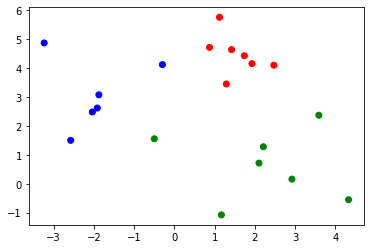

In [6]:
X, y = make_blobs(n_samples=20, n_features=2, centers=3, random_state=0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

plt.scatter(X[:, 0], X[:, 1], c=np.array(['r', 'g', 'b'])[y]);

In [7]:
model = MulticlassClassification()

model.fit(X_train, y_train)

accuracy_score(y_test, model.predict(X_test))

0.8

# Iris Dataset 🌷

In [8]:
data = pd.read_csv('/kaggle/input/iris/Iris.csv')

data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [9]:
X, y = data[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']], data['Species']

label_encoding = LabelEncoder()
y = label_encoding.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [10]:
clf = MulticlassClassification()

clf.fit(X_train, y_train)

accuracy_score(y_test, clf.predict(X_test))

0.9333333333333333